OBJETIVO GENERAL: Determinar a través de diferentes análisis de cuatro tiendas cual es la que posee menor rentabilidad

### Importación de datos



In [1]:
import pandas as pd

url  = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head(5)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [2]:
tienda["Sucursal"] ="Sucursal 1"
tienda2["Sucursal"] ="Sucursal 2"
tienda3["Sucursal"] ="Sucursal 3"
tienda4["Sucursal"] ="Sucursal 4"


In [4]:
df_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
df_total.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Sucursal
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Sucursal 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Sucursal 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Sucursal 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Sucursal 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Sucursal 1


#1. Análisis de facturación



In [42]:
facturacion_por_sucursal = df_total.groupby("Sucursal")["Precio"].sum().reset_index()
facturacion_por_sucursal.columns = ["Sucursal", "Facturación"]

total_ventas = df_total["Precio"].sum()

facturacion_por_sucursal["Facturación_MM$"] = (facturacion_por_sucursal["Facturación"] / 1000000).round(2)

facturacion_por_sucursal["Porcentaje"] = (facturacion_por_sucursal["Facturación"] / total_ventas * 100).round(2)

print("La facturación por sucursal expresada en MM$ y porcentaje del total:")
encabezado = f"{'Sucursal':<15} {'Facturación_MM$':<20} {'% Aporte':<15}"
Separador = '*' *len(encabezado)

print(Separador)
print(encabezado)
print(Separador)

for _, fila in facturacion_por_sucursal.iterrows():
  print(f"{fila['Sucursal']:<15} {fila['Facturación_MM$']:<20} {fila['Porcentaje']:<15}")

print(Separador)

print(f"\nTotal de ventas: {round(total_ventas / 1000000, 2)} MM$")


La facturación por sucursal expresada en MM$ y porcentaje del total:
****************************************************
Sucursal        Facturación_MM$      % Aporte       
****************************************************
Sucursal 1      1150.88              26.13          
Sucursal 2      1116.34              25.35          
Sucursal 3      1098.02              24.93          
Sucursal 4      1038.38              23.58          
****************************************************

Total de ventas: 4403.62 MM$


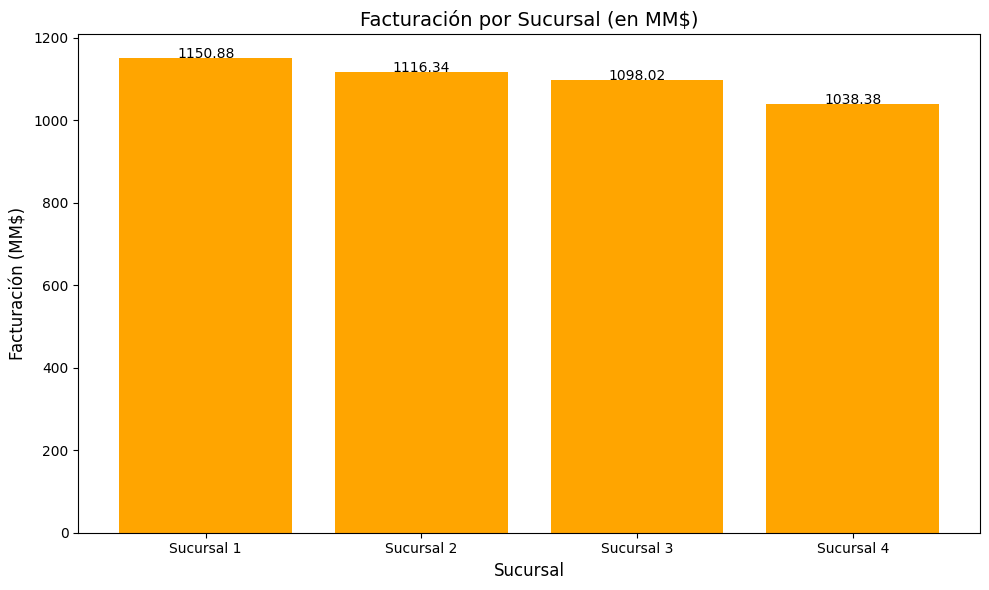

In [54]:
import matplotlib.pyplot as plt

# Crear gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.bar(facturacion_por_sucursal["Sucursal"], facturacion_por_sucursal["Facturación_MM$"], color='orange')

# Títulos y etiquetas
plt.title("Facturación por Sucursal (en MM$)", fontsize=14)
plt.xlabel("Sucursal", fontsize=12)
plt.ylabel("Facturación (MM$)", fontsize=12)

# Mostrar valores encima de las barras
for index, value in enumerate(facturacion_por_sucursal["Facturación_MM$"]):
    plt.text(index, value + 0.1, f"{value:.2f}", ha='center', fontsize=10)

# Mostrar gráfico
plt.tight_layout()
plt.show()


Se procede a unir los 4 archivos .CSV, esto con la intención de trabajar con  una sola base de datos, así mismo los montos en $ están expresados en Millones para tener una mejor visibilidad de los datos. De acuerdo a la primera actividad de facturación por sucursales puede observarse que la sucursal que más factura es la número 1 con un 26,13% y la que menos factura es la Sucursal 4 con un 23,58%, sin embargo es necesario analizar otro tipos de variables que puedan ayudar a definir cual de las 4 sucursales es menos rentable.

In [29]:
import pandas as pd

# Convertir fechas
df_total['Fecha de Compra'] = pd.to_datetime(df_total['Fecha de Compra'], errors='coerce')
df_total['Año'] = df_total['Fecha de Compra'].dt.year

# Agrupar por sucursal y año
facturacionanual = df_total.groupby(['Sucursal', 'Año']).agg(
    MM=("Precio", lambda x: round(x.sum() / 1_000_000, 2)),
    Clientes=("Producto", 'count')
).reset_index()

facturacionanual = facturacionanual.rename(columns={"Clientes": "Número de Clientes"})

facturacionanual = facturacionanual[["Sucursal", "Año", "Número de Clientes", "MM"]]


print("*" * 70)
print(f"{'Sucursal':<15} {'Año':<6} {'Clientes':>20} {'Monto (MM$)':>20}")
print("*" * 70)

for _, row in facturacionanual.iterrows():
    print(f"{row['Sucursal']:<15} {row['Año']:<6} {row['Número de Clientes']:>20} {row['MM']:>20.2f}")

print("*" * 70)

# Calcular variaciones entre los dos últimos años por sucursal
print("\nVariación entre los dos últimos años por Sucursal:\n")
print(f"{'Sucursal':<15} {'Var Clientes (%)':>20} {'Var Monto MM$ (%)':>25}")
print("-" * 65)

variaciones = []

for sucursal, grupo in facturacionanual.groupby("Sucursal"):
    grupo_ordenado = grupo.sort_values("Año")

    if len(grupo_ordenado) >= 2:
        año_actual = grupo_ordenado.iloc[-2]
        año_anterior = grupo_ordenado.iloc[-3]

        var_clientes = ((año_actual["Número de Clientes"] - año_anterior["Número de Clientes"]) / año_anterior["Número de Clientes"]) * 100
        var_mm = ((año_actual["MM"] - año_anterior["MM"]) / año_anterior["MM"]) * 100

        print(f"{sucursal:<15} {var_clientes:>20.2f} {var_mm:>25.2f}")



**********************************************************************
Sucursal        Año                Clientes          Monto (MM$)
**********************************************************************
Sucursal 1      2020                    715               368.93
Sucursal 1      2021                    739               362.12
Sucursal 1      2022                    713               316.57
Sucursal 1      2023                    192               103.26
Sucursal 2      2020                    700               320.47
Sucursal 2      2021                    759               351.22
Sucursal 2      2022                    708               358.23
Sucursal 2      2023                    192                86.43
Sucursal 3      2020                    701               321.71
Sucursal 3      2021                    740               362.95
Sucursal 3      2022                    740               350.44
Sucursal 3      2023                    178                62.92
Sucursal 4   

Se realiza análisis tomando en cuenta los años de facturación y número de clientes por sucursal, aunado a esto se realiza la variación entre el año posterior comparado con el año más reciente, sin incluir el año 2023 debido a que al parecer está comenzando este año y no se tiene mucha información, es decir no se puede comparar aún, sin embargo tomamos año 2022 contra año 2021, tomando en cuenta el análisis de la facturación inicial y de acuerdo a la variación por años y Sucursales puede observarse que la Sucursal 4 es la que tiene el peor ïndice, ya que la tienda 2 tiene la variación negativa másl alta en clientes, puede observarse que mejoró en MM$ de forma positiva, cosa que ninguna de las otras tres pudieron.

In [34]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
# Convertir fechas
df_total['Fecha de Compra'] = pd.to_datetime(df_total['Fecha de Compra'], errors='coerce')
df_total['Año'] = df_total['Fecha de Compra'].dt.year
df_total['Mes'] = df_total['Fecha de Compra'].dt.month

consolidado= df_total[['Mes', 'Año']].drop_duplicates()
#print(consolidado.sort_values(by=['Mes', 'Año']))
print(consolidado.sort_values(by=['Mes', 'Año']))

     Mes   Año
19     1  2020
0      1  2021
8      1  2022
157    1  2023
9      2  2020
43     2  2021
70     2  2022
24     2  2023
117    3  2020
2      3  2021
44     3  2022
23     3  2023
10     4  2020
42     4  2021
22     4  2022
48     5  2020
34     5  2021
1      5  2022
92     6  2020
7      6  2021
69     6  2022
28     7  2020
11     7  2021
21     7  2022
38     8  2020
6      8  2021
52     8  2022
13     9  2020
30     9  2021
40     9  2022
101   10  2020
82    10  2021
76    10  2022
4     11  2020
77    11  2021
120   11  2022
5     12  2020
29    12  2021
49    12  2022


Se realiza este código para comprobar que realmente el año 2023 posee datos solo hasta marzo, lo que nos hace pensar que estamos aún en el primer trimestre del mismo.

# 2. Ventas por categoría

In [ ]:
ventasxproduct = df_total.groupby(['Sucursal','Categoría del Producto'])['Precio'].sum().reset_index()
ventasxproduct['Precio'] = (ventasxproduct['Precio'] / 1_000_000).round(2)

print("*" * 90)
print(f"{'Sucursal':<20} {'Categoría del Producto':<25} {'Monto (MM$)':>35}")
print("*" * 90)

for index, row in ventasxproduct.iterrows():
    print(f"{row['Sucursal']:<20}{row['Categoría del Producto']:<25} {row['Precio']:>35.2f}")

print("*" * 90)

******************************************************************************************
Sucursal             Categoría del Producto                            Monto (MM$)
******************************************************************************************
Sucursal 1          Artículos para el hogar                                 12.70
Sucursal 1          Deportes y diversión                                    39.29
Sucursal 1          Electrodomésticos                                      363.69
Sucursal 1          Electrónicos                                           429.49
Sucursal 1          Instrumentos musicales                                  91.30
Sucursal 1          Juguetes                                                18.00
Sucursal 1          Libros                                                   8.78
Sucursal 1          Muebles                                                187.63
Sucursal 2          Artículos para el hogar                                 14.

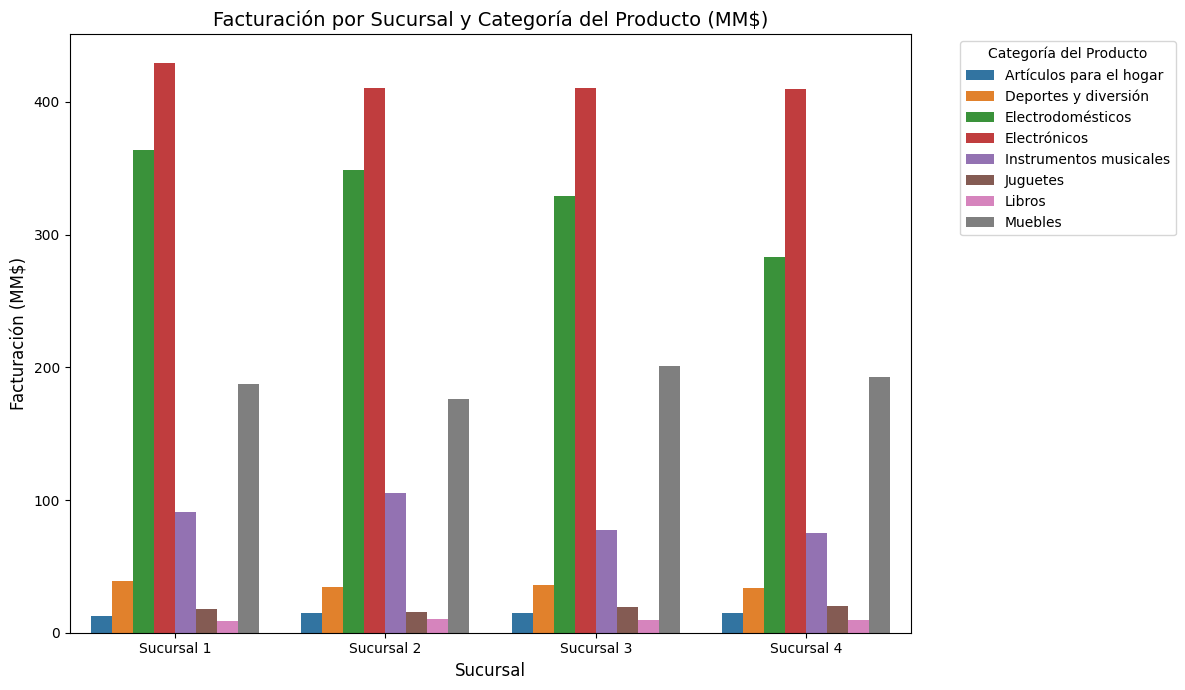

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
ventasxproducto = df_total.groupby(['Sucursal', 'Categoría del Producto'])['Precio'].sum().reset_index()

ventasxproducto['Precio_MM$'] = (ventasxproducto['Precio'] / 1_000_000).round(2)

plt.figure(figsize=(12, 7))
sns.barplot(data=ventasxproducto, x='Sucursal', y='Precio_MM$', hue='Categoría del Producto')


plt.title('Facturación por Sucursal y Categoría del Producto (MM$)', fontsize=14)
plt.xlabel('Sucursal', fontsize=12)
plt.ylabel('Facturación (MM$)', fontsize=12)
plt.legend(title='Categoría del Producto', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar gráfico
plt.tight_layout()
plt.show()

Es de notar que si bien el producto Mesa de noche es el más vendido no representa mucho en cuanto a ingresos, sin embargo se observa que el Celular ABXY perteneciente a la categoría de los electrónicos es de lo menos vendido, pero representa una buena cantidad de ingresos para las tiendas

In [35]:
producto_buscado = "Mesa de noche"

# Filtra las filas donde el producto esté incluido en la columna 'Producto'
resultado = df_total[df_total["Producto"].str.contains(producto_buscado, case=False, na=False)]

# Mostrar solo la categoría o las categorías únicas
categorias = resultado["Categoría del Producto"].unique()

print(f"El producto '{producto_buscado}' pertenece a la(s) categoría(s): {categorias}")

El producto 'Mesa de noche' pertenece a la(s) categoría(s): ['Muebles']


# 3. Calificación promedio de la tienda


In [41]:
promedio_cali= df_total.groupby('Sucursal')['Calificación'].mean().reset_index()
print("*" * 50)
print(f"{'Sucursal':<15} {'Promedio Calificación':>30}")
print("*" * 50)

for index, row in promedio_cali.iterrows():
    print(f"{row['Sucursal']:<15} {row['Calificación']:>30.2f}")

print("*" * 50)

**************************************************
Sucursal                 Promedio Calificación
**************************************************
Sucursal 1                                3.98
Sucursal 2                                4.04
Sucursal 3                                4.05
Sucursal 4                                4.00
**************************************************


A pesar de que la Sucursal 4 tienes menos facturación que el resto, por lo menos tiene mejor calificación según los clientes que la Sucursal 1

# 4. Productos más y menos vendidos

In [61]:
from collections import defaultdict, Counter


productos_expandido = []

for _, row in df_total.iterrows():
    productos = [p.strip() for p in row['Producto'].split(',')]
    precio_unitario = row['Precio'] / len(productos)

    for producto in productos:
        productos_expandido.append((producto, precio_unitario))


conteo = Counter()
monto_por_producto = defaultdict(float)

for producto, monto in productos_expandido:
    conteo[producto] += 1
    monto_por_producto[producto] += monto

productos_totales = []
for producto in conteo:
    cantidad = conteo[producto]
    monto_mm = monto_por_producto[producto] / 1_000_000
    productos_totales.append((producto, cantidad, monto_mm))

# Ordenar por cantidad vendida
top_ventas = sorted(productos_totales, key=lambda x: x[1], reverse=True)[:10]
bottom_ventas = sorted(productos_totales, key=lambda x: x[1])[:10]


print("*" * 120)
print(f"{'Top 10 Más Vendidos (por cantidad)':<55}     {'Top 10 Menos Vendidos (por cantidad)':<50}")
print(f"{'Producto':<25} {'Cantidad':>8} {'MM$':>12}     {'Producto':<30} {'Cantidad':>8} {'MM$':>15}")
print("*" * 120)

for i in range(10):
    prod_top = top_ventas[i]
    prod_bot = bottom_ventas[i]

    print(f"{prod_top[0]:<25} {prod_top[1]:>8} {prod_top[2]:>12.2f}     "
          f"{prod_bot[0]:<30} {prod_bot[1]:>8} {prod_bot[2]:>15.2f}")

print("*" * 120)




************************************************************************************************************************
Top 10 Más Vendidos (por cantidad)                          Top 10 Menos Vendidos (por cantidad)              
Producto                  Cantidad          MM$     Producto                       Cantidad             MM$
************************************************************************************************************************
Mesa de noche                  210        58.42     Celular ABXY                        157          157.91
Microondas                     206       115.70     Auriculares con micrófono           158           22.75
Carrito de control remoto      206        14.77     Mochila                             163           16.07
Batería                        203       147.81     Guitarra eléctrica                  165          129.40
Cama king                      201       135.78     Ciencia de datos con Python         166            9.04

Es de notar que si bien el producto Mesa de noche es el más vendido no representa mucho en cuanto a ingresos, sin embargo se observa que el Celular ABXY perteneciente a la categoría de los electrónicos es de lo menos vendido, pero representa una buena cantidad de ingresos para las tiendas


In [40]:
producto_buscado = "Batería"

resultado = df_total[df_total["Producto"].str.contains(producto_buscado, case=False, na=False)]

categorias = resultado["Categoría del Producto"].unique()

print(f"El producto '{producto_buscado}' pertenece a la(s) categoría(s): {categorias}")

El producto 'Batería' pertenece a la(s) categoría(s): ['Instrumentos musicales']


# 5. Envío promedio por tienda

In [ ]:
promedioenvio = df_total.groupby('Sucursal')['Costo de envío'].mean().reset_index()
#promedioenvio['Costo de envío'] = promedioenvio['Costo de envío'].round(2)

print("*" * 50)
print(f"{'Sucursal':<15} {'Promedio Costo de Envío':>30}")
print("*" * 50)

for index, row in promedioenvio.iterrows():
    print(f"{row['Sucursal']:<15} {row['Costo de envío']:>30.2f}")

print("*" * 50)

**************************************************
Sucursal               Promedio Costo de Envío
**************************************************
Sucursal 1                            26018.61
Sucursal 2                            25216.24
Sucursal 3                            24805.68
Sucursal 4                            23459.46
**************************************************


Puede observarse que el promedio de envío más bajo lo posee la Sucursal 4, sin embargo el costo de envío no es un indicador de mucha importancia, debido a que si el envío es alto es porque la sucursal tiene buena facturacón, no debe observarse como negativo. Antes de emitir una opinión se procederá a realizar un análisis con un indicador al cual llamé IRE (Indicador de Rentabilidad y Eficiencia y se basa en tres aspectos fundamentales, su fórnula es IRE = (Promedio de facturación - Costo Promedio de envío)*(Promedio de calificación)


In [58]:
totales = df_total.groupby('Sucursal').agg(
    factura=("Precio", 'mean'),
    Costenv=("Costo de envío", 'mean'),
    Calif=("Calificación", 'mean')
).reset_index()

# Calcular IRE
totales["IRE"] = (totales["factura"] - totales["Costenv"]) * totales["Calif"]

totales["IRE"] = totales["IRE"].round(2)

print("*" * 35)
print(f"{'Sucursal':<15} {'IRE':>10}")
print("*" * 35)

for _, row in totales.iterrows():
    print(f"{row['Sucursal']:<15}  {row['IRE']:>10.2f}")

print("*" * 35)


***********************************
Sucursal               IRE
***********************************
Sucursal 1       1836629.20
Sucursal 2       1808757.35
Sucursal 3       1783911.22
Sucursal 4       1665845.70
***********************************


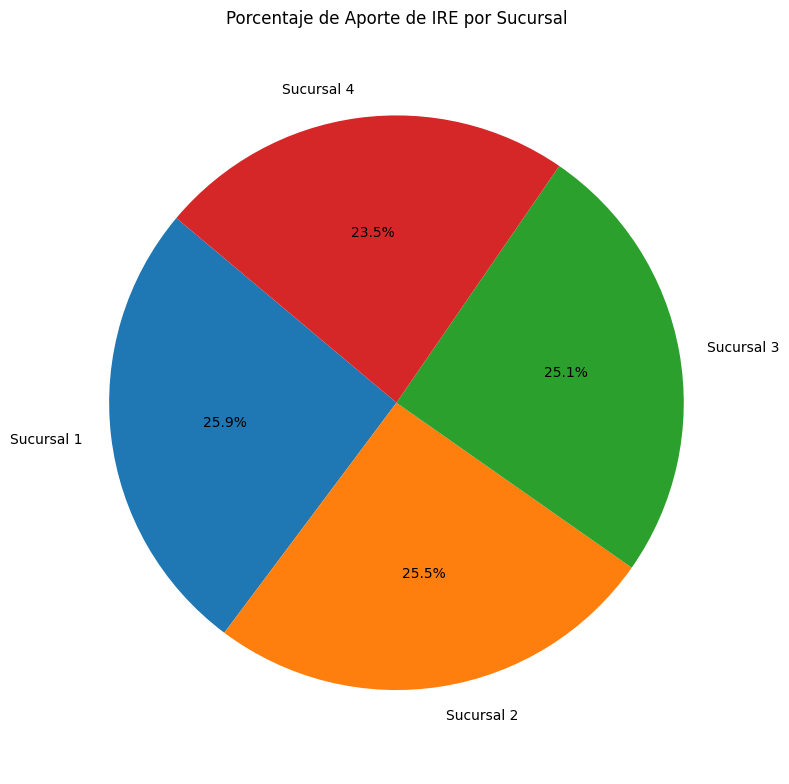

In [60]:
ire_df = df_total.groupby('Sucursal').agg(
    factura=('Precio', 'mean'),
    costenv=('Costo de envío', 'mean'),
    calif=('Calificación', 'mean')
).reset_index()

ire_df['IRE'] = (ire_df['factura'] - ire_df['costenv']) * ire_df['calif']

ire_df['Porcentaje'] = (ire_df['IRE'] / ire_df['IRE'].sum()) * 100
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(ire_df['Porcentaje'], labels=ire_df['Sucursal'], autopct='%1.1f%%', startangle=140)

plt.title('Porcentaje de Aporte de IRE por Sucursal')
plt.axis('equal')
plt.tight_layout()
plt.show()

**CONCLUSIÓN**

Luego de realizar un análisis detallado sobre las cuatro sucursales, considerando los tres aspectos fundamentales previamente definidos: facturación, costo de envío y calificación de los clientes, y aplicando la fórmula del Indicador de Rentabilidad y Eficiencia (IRE), se evidenciaron patrones consistentes en los resultados obtenidos.

A través de las distintas estrategias de evaluación empleadas comparativas directas y análisis ponderado se identificó de forma reiterada que la Sucursal Nro. 4 presenta el menor desempeño en relación con las demás. Esta sucursal no solo mostró una facturación más baja, sino que también reflejó menores niveles de eficiencia operativa y una calificación de clientes inferior al promedio.

En consecuencia, y tomando en cuenta tanto los datos cuantitativos como el criterio estratégico, se recomienda al Sr. Juán considerar la venta de la Sucursal Nro. 4, ya que representa la unidad menos rentable y eficiente dentro del portafolio actual de tiendas.